### Алгоритм линейной регрессии. Градиентный спуск###

**1. Подберите скорость обучения (alpha) и количество итераций для достижения минимальног значения функции потерь;**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
n = X.shape[1]
alpha = 0.015
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.015)

In [9]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [10]:
error =[]

In [11]:
for i in range(1100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        if i % 100 == 0:
            print(i, W, err)
        if i % 10 == 0:
            error.append(err)

0 [2.653 0.5  ] 3173.15
0 [2.653 5.6  ] 3173.15
100 [38.21842136  5.60153819] 91.01248538892533
100 [38.21842136  5.57516691] 91.01248538892533
200 [45.3605556   4.26179286] 47.88083415613009
200 [45.3605556   4.25631719] 47.88083415613009
300 [46.84353102  3.98361139] 46.02128366869774
300 [46.84353102  3.98247443] 46.02128366869774
400 [47.15145244  3.92585046] 45.94111219562693
400 [47.15145244  3.92561439] 45.94111219562693
500 [47.21538849  3.91385712] 45.93765573389719
500 [47.21538849  3.91380811] 45.93765573389719
600 [47.22866402  3.91136686] 45.93750671421187
600 [47.22866402  3.91135668] 45.93750671421187
700 [47.23142052  3.91084978] 45.937500289472226
700 [47.23142052  3.91084767] 45.937500289472226
800 [47.23199287  3.91074242] 45.937500012480136
800 [47.23199287  3.91074198] 45.937500012480136
900 [47.23211171  3.91072013] 45.93750000053807
900 [47.23211171  3.91072004] 45.93750000053807
1000 [47.23213639  3.9107155 ] 45.937500000023206
1000 [47.23213639  3.91071548] 45.

Text(0, 0.5, 'MSE')

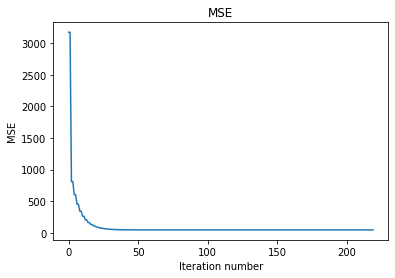

In [12]:
plt.plot(range(len(error)), error)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

#### alpha = 0.015; iter = 1100####

**2 (опция). В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:**

In [ ]:
for i in range(6000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
     '''for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y))) '''
    W -= alpha * (1/n * 2 * np.dot(X,(y_pred - y)))
    if i % 500 == 0:
        print(i, W, err)

**3 (опция). Реализовать один из критериев останова, перечисленный в методичке.**

In [175]:
min_weight_dist = 1e-6

In [176]:
for i in range(1100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    new_w = W - alpha * (1/n * 2 * np.dot(X,(y_pred - y)))
    weight_dist = np.linalg.norm(new_w - W, ord=2)
    W = new_w    
    if i % 500 == 0:
        print(i, W, err)
    if weight_dist < min_weight_dist:
        print(i, W, err, 'Достигнуто условие останова')  
        break

0 [2.653 5.6  ] 3173.15
500 [47.21538849  3.91380811] 45.93765573389719
857 [47.23208163  3.91072559] 45.93750000207943 Достигнуто условие останова
